In [1]:
import os
os.getcwd()
os.chdir("C:\Data")
os.getcwd()

# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import geopandas as gpd
import urllib.request
import json
#import folium
from IPython.display import Image
#import contextily as ctx
from matplotlib.colors import ListedColormap

In [44]:
#my roles; data cleaning, finding the categories, logistic recoding? categorical?
data = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep="\t", parse_dates=['Start Date'])
data

C:\Users\dylan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,28,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84873,"77,070",148925,https://cityoflearning-uploads.s3.amazonaws.co...,Medicina Scholars,<p>The Medicina Scholars program is designed t...,Hispanic Center of Excellence at UIC,Healthcare,NaN,18,24,...,pguzman7@uic.edu,312-996-4493,Free,NEAR WEST SIDE,Unknown_Code,NO,NaN,41.871422,-87.671524,NaN
84874,"75,634",146348,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Helping Your Community.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False
84875,"75,635",146348,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Nature.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False
84876,"75,638",146350,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Helping Your Community.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False


In [85]:
free = data.loc[data['Program Price'] == 'Free']

In [86]:
food_free = free.loc[free['Program Provides Free Food'] == True]

In [87]:
trans_food_free = food_free.loc[food_free['Program Provides Transportation'] == 'YES']


In [88]:
food = data.loc[data['Program Provides Free Food'] == True]

In [89]:
trans = data.loc[data['Program Provides Transportation'] == 'YES']
trans

,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False
5,"4,558",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Work + Career,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False
7,"4,549",78744,https://cityoflearning-uploads.s3.amazonaws.co...,The Gray Matter Experience,The Gray Matter Experience (TGME) is a non pro...,The Gray Matter Experience,Helping Your Community.,50.0,14,18,...,info@graymatterexperience.com,NaN,Free,NaN,"Paid, Type Unknown",NO,YES,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73927,"73,723",144556,https://cityoflearning-uploads.s3.amazonaws.co...,STEAM Team,"<p>A mystery themed, project-based enrichment ...",Agape Center,Computers.,15.0,12,14,...,brad.harry@cru.org,773-821-7060,$50 or Less,NaN,Unknown_Code,NO,YES,41.689190,-87.831322,NaN
74000,"73,724",144557,https://cityoflearning-uploads.s3.amazonaws.co...,Learn2Earn,<p>Gain tangible technology skills for the wor...,Agape Center,Academic Support,15.0,13,18,...,brad.harry@cru.org,773-821-7060,$50 or Less,ROSELAND,Unknown_Code,NO,YES,41.692726,-87.631996,NaN
74001,"73,725",144557,https://cityoflearning-uploads.s3.amazonaws.co...,Learn2Earn,<p>Gain tangible technology skills for the wor...,Agape Center,Computers.,15.0,13,18,...,brad.harry@cru.org,773-821-7060,$50 or Less,ROSELAND,Unknown_Code,NO,YES,41.692726,-87.631996,NaN
76762,"75,659",146393,https://cityoflearning-uploads.s3.amazonaws.co...,29th Annual Parent Leadership Conference,<p>On March 24th-25th Youth Guidance will be ...,Youth Guidance,Helping Your Community.,500.0,18,65,...,mbullock@youth-guidance.org,NaN,More Than $50,NaN,Unknown_Code,YES,YES,41.803677,-88.121300,True


In [92]:
d = {'is_it_free': ['Free program price', 'Free food', 'Free transportation'],
    'counts': [len(free), len(food), len(trans)]}
d

{'is_it_free': ['Free program price', 'Free food', 'Free transportation'],
 'counts': [37061, 548, 77]}

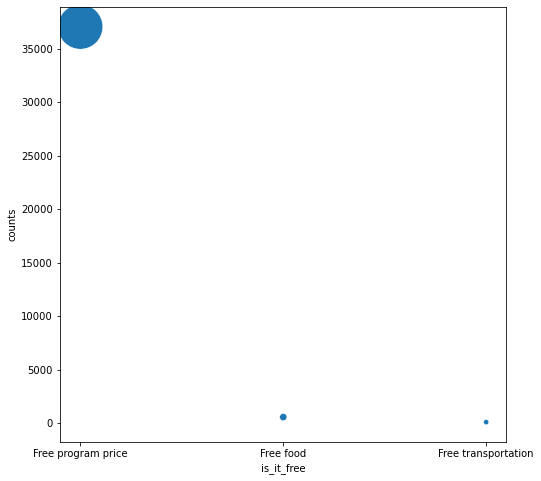

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
plot = sns.scatterplot(data = d, x = 'is_it_free', 
                y = 'counts', size = 'counts', sizes =(27, 2000))
plt.legend([],[], frameon=False)
plt.show()

In [34]:
data['Category Name'].nunique()

27

<AxesSubplot:>

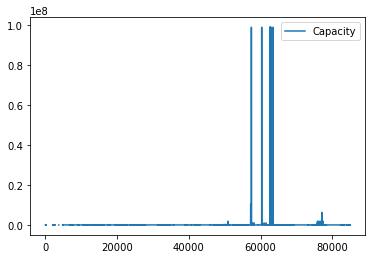

In [20]:
data.plot(y = 'Capacity', use_index = True)

In [97]:
free

,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84873,"77,070",148925,https://cityoflearning-uploads.s3.amazonaws.co...,Medicina Scholars,<p>The Medicina Scholars program is designed t...,Hispanic Center of Excellence at UIC,Healthcare,NaN,18,24,...,pguzman7@uic.edu,312-996-4493,Free,NEAR WEST SIDE,Unknown_Code,NO,NaN,41.871422,-87.671524,NaN
84874,"75,634",146348,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Helping Your Community.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False
84875,"75,635",146348,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Nature.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False
84876,"75,638",146350,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Helping Your Community.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False


In [99]:
category = free.groupby('Category Name')
category

In [105]:
free_plot = category.size
free_plot

Id                                        \
                              count           mean           std      min   
Category Name                                                               
Academic Support             1149.0  115306.694517  24131.765792  76829.0   
Building & Fixing Things      826.0  128870.628329  18136.731946  76358.0   
Building And Fixing Things      2.0   76494.000000      1.414214  76493.0   
Computers                       6.0   76504.000000    113.359605  76435.0   
Computers.                   1085.0  124552.837788  19880.089003  76358.0   
Customer/Human Service         36.0  121087.694444  16356.157053  93742.0   
Digital Media.                186.0  102530.494624  22822.604004  76829.0   
Food.                         459.0  107402.209150  18428.173852  76991.0   
Healthcare                    512.0   99819.160156  16553.310722  76837.0   
Helping Your Community          1.0   76706.000000           NaN  76706.0   
Helping Your Community.       632.0  108532.799051  21011.185071  76837.0   
Law                             7.0  103081.428571  18953.408382  84401.0   
Managing Money.               354.0  124107.627119  18072.914327  76360.0   
Math                           29.0   99906.413793  17644.064885  76862.0   
Music & Art.                13519.0  124795.245876  18753.864099  76833.0   
Nature.                       467.0  114958.284797  20827.772799  76978.0   
Performance.                  360.0  108267.794444  20778.286014  76841.0   
Reading & Writing               1.0   76861.000000           NaN  76861.0   
Reading & Writing.           7592.0  121772.695205  20732.100032  76847.0   
Science                      1197.0  117900.310777  22611.264905  76833.0   
Science & Math                  5.0   76548.400000    154.108079  76435.0   
Social Studies                166.0  122348.349398  17665.688999  76995.0   
Sports + Wellness.           8011.0  117059.862189  22492.999110  76830.0   
Teaching                       10.0  102382.400000  21678.853153  77249.0   
Transportation                 12.0   97318.583333  15892.287194  84428.0   
Work + Career                 435.0  111635.124138  20649.079004  76829.0   

                                                                     Capacity  \
                                  25%       50%        75%       max    count   
Category Name                                                                   
Academic Support             93369.00  114618.0  138305.00  156674.0   1011.0   
Building & Fixing Things    120543.25  135104.0  139849.50  156538.0    724.0   
Building And Fixing Things   76493.50   76494.0   76494.50   76495.0      2.0   
Computers                    76436.25   76465.0   76494.50   76728.0      6.0   
Computers.                  113295.00  127555.0  138817.00  156758.0    973.0   
Customer/Human Service      103661.75  123795.0  134623.25  144490.0      7.0   
Digital Media.               85192.50   93743.0  124450.50  156681.0    121.0   
Food.                        88660.50   99412.0  127121.50  154196.0    423.0   
Healthcare                   88264.25   99977.5  104917.75  153922.0    462.0   
Helping Your Community       76706.00   76706.0   76706.00   76706.0      1.0   
Helping Your Community.      87980.75  107300.0  121959.00  156681.0    456.0   
Law                          87076.50   93761.0  122401.00  124453.0      3.0   
Managing Money.             114095.00  121381.0  138142.50  156482.0    316.0   
Math                         88474.00   94198.0  105428.00  144455.0     25.0   
Music & Art.                113717.50  126743.0  138442.50  156683.0  12481.0   
Nature.                      98085.00  119707.0  128720.50  156497.0    412.0   
Performance.                 94531.25   99266.0  124510.00  156564.0    294.0   
Reading & Writing            76861.00   76861.0   76861.00   76861.0      1.0   
Reading & Writing.          105830.75  125222.0  138290.25  156544.0   7123.0   
Science          

In [156]:
plot = category.size().reset_index()
plot.columns = ['Category_Name', 'Count']
plot

,Category_Name,Count
0,Academic Support,1149
1,Building & Fixing Things,826
2,Building And Fixing Things,2
3,Computers,6
4,Computers.,1085
5,Customer/Human Service,36
6,Digital Media.,186
7,Food.,459
8,Healthcare,512
9,Helping Your Community,1


<AxesSubplot:xlabel='Count', ylabel='Category_Name'>

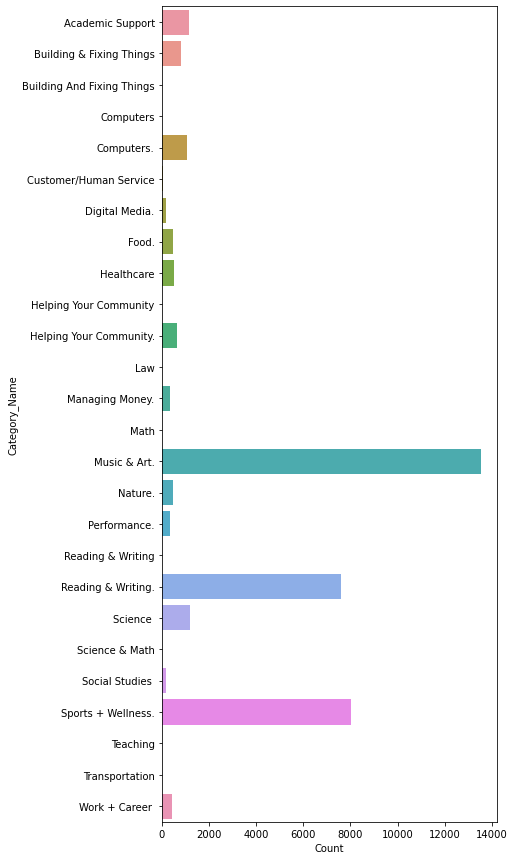

In [159]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(data = plot, x = plot['Count'], y = plot['Category_Name'], )